# Importing Libraries

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization,Flatten
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra

# Loading the data

In [2]:
DATA_DIR = 'Data/training/training'
CATEGORIES = os.listdir(DATA_DIR)
IMG_SIZE = 70
data = []
print(CATEGORIES)

['n7', 'n4', 'n0', 'n5', 'n1', 'n9', 'n2', 'n3', 'n6', 'n8']


In [3]:
for category in CATEGORIES:
    path = os.path.join(DATA_DIR,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        data.append([new_array,class_num])

In [4]:
np.shape(data)

(1098, 2)

# separating into features and labels

In [5]:
X = []
Y = []

for feature,label in data:
    X.append(feature)
    Y.append(label)

X = np.array(X)
Y = np.array(Y)

In [6]:
np.shape(X)

(1098, 70, 70, 3)

# Plotting some images

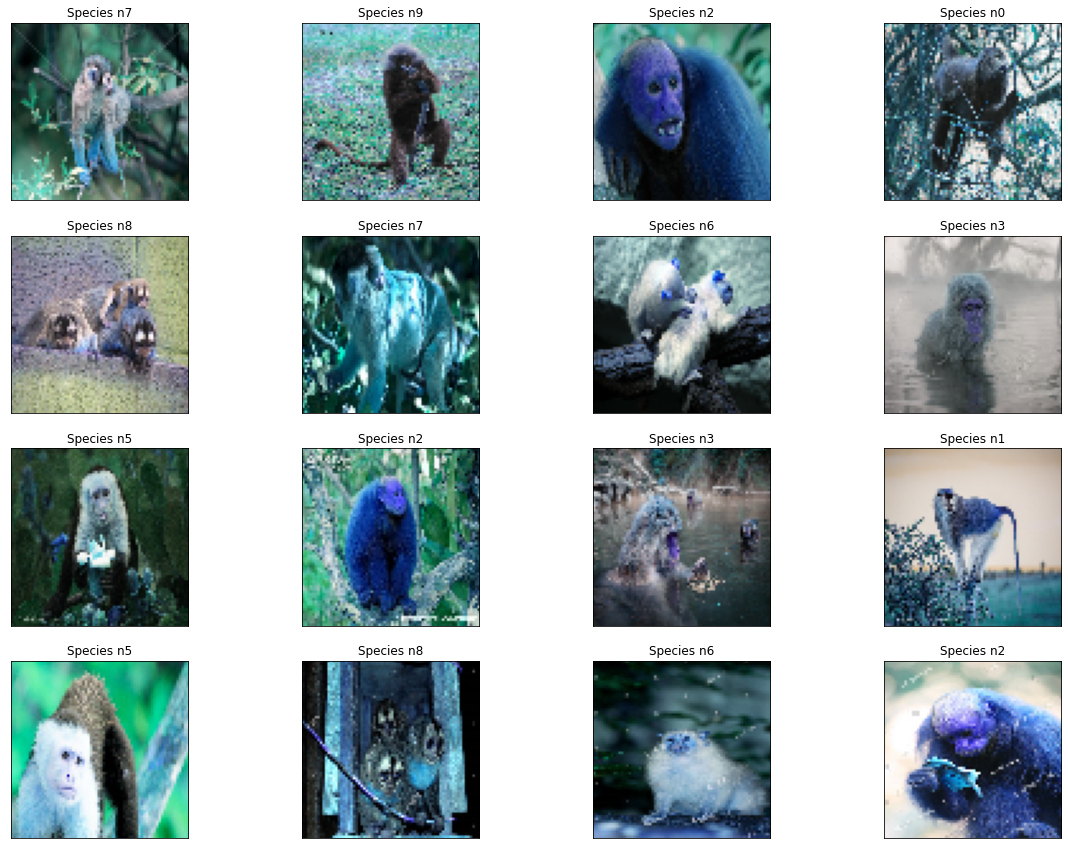

In [7]:
val = np.random.randint(0, X.shape[0], 16)
r = 1
plt.figure(figsize=(20,15))
for value in val:
    
    plt.subplot(4,4,r)
    r += 1
    plt.title('Species '+CATEGORIES[Y[value]])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[value])
    
plt.show()

# converting label to categorical value

In [8]:
Y = to_categorical(Y)

# Spliting the data into train and test

In [9]:
x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=0.25,random_state=0)

# Data Augumentaion

In [10]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1
            )
datagen.fit(x_train)

# CNN

In [11]:
import tensorflow as tf
from keras import Model, Input
input1 = Input(shape=(70,70,3))
conv1 = Conv2D(64,3,padding='same',activation='relu')(input1)
maxpool1 = MaxPool2D(pool_size = (3,3))(conv1)
conv2 = Conv2D(32,3,padding='same',activation='relu')(maxpool1)
maxpool2 = MaxPool2D(pool_size = (3,3))(conv2)
conv3 = Conv2D(16,1,padding='same')(maxpool2)
maxpool3 = MaxPool2D(pool_size = (3,3))(conv3)
den1 = Dense(64,activation='relu')(maxpool3)
batch1 = BatchNormalization()(den1)
flat = Flatten()(batch1)
den2 = Dense(32)(flat)
drop = Dropout(0.5)(den2)
den3 = Dense(10)(drop)
output = Dense(10, activation='softmax')(den3)
model = Model(inputs=input1,outputs=output)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 70, 70, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          528       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 16)          0  

In [12]:
model.fit_generator(datagen.flow(x_train,y_train, batch_size=32), epochs = 200, validation_data=(x_val,y_val))


Epoch 1/200
26/26 [==============================] - 6s 223ms/step - loss: 3.0664 - accuracy: 0.1373 - val_loss: 7.9867 - val_accuracy: 0.1491
Epoch 2/200
26/26 [==============================] - 4s 165ms/step - loss: 2.4106 - accuracy: 0.2114 - val_loss: 4.9716 - val_accuracy: 0.1236
Epoch 3/200
26/26 [==============================] - 4s 162ms/step - loss: 2.2336 - accuracy: 0.2552 - val_loss: 4.3603 - val_accuracy: 0.1418
Epoch 4/200
26/26 [==============================] - 4s 155ms/step - loss: 2.1042 - accuracy: 0.2734 - val_loss: 3.1138 - val_accuracy: 0.1927
Epoch 5/200
26/26 [==============================] - 4s 151ms/step - loss: 2.0255 - accuracy: 0.3026 - val_loss: 2.4458 - val_accuracy: 0.2655
Epoch 6/200
26/26 [==============================] - 4s 152ms/step - loss: 1.9304 - accuracy: 0.3171 - val_loss: 2.9407 - val_accuracy: 0.1673
Epoch 7/200
26/26 [==============================] - 4s 154ms/step - loss: 1.8635 - accuracy: 0.3426 - val_loss: 2.8991 - val_accuracy: 0.170

Epoch 113/200
26/26 [==============================] - 4s 163ms/step - loss: 0.6270 - accuracy: 0.7947 - val_loss: 0.9181 - val_accuracy: 0.7127
Epoch 114/200
26/26 [==============================] - 5s 174ms/step - loss: 0.6469 - accuracy: 0.7801 - val_loss: 1.0677 - val_accuracy: 0.7564
Epoch 115/200
26/26 [==============================] - 4s 151ms/step - loss: 0.5818 - accuracy: 0.8019 - val_loss: 1.1739 - val_accuracy: 0.6800
Epoch 116/200
26/26 [==============================] - 4s 146ms/step - loss: 0.5643 - accuracy: 0.8104 - val_loss: 0.8834 - val_accuracy: 0.7418
Epoch 117/200
26/26 [==============================] - 4s 141ms/step - loss: 0.5430 - accuracy: 0.8117 - val_loss: 0.9639 - val_accuracy: 0.7164
Epoch 118/200
26/26 [==============================] - 4s 146ms/step - loss: 0.5549 - accuracy: 0.8104 - val_loss: 1.3188 - val_accuracy: 0.6764
Epoch 119/200
26/26 [==============================] - 4s 141ms/step - loss: 0.5551 - accuracy: 0.8214 - val_loss: 2.3474 - val_ac

# Loding the testing data

In [13]:
DATA_DIR = './Data/validation/validation'
CATEGORIES = os.listdir(DATA_DIR)
IMG_SIZE = 70
data = []
print(CATEGORIES)
for category in CATEGORIES:
    path = os.path.join(DATA_DIR,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        data.append([new_array,class_num])

['n7', 'n4', 'n0', 'n5', 'n1', 'n9', 'n2', 'n3', 'n6', 'n8']


# Spliting the testing data

In [14]:
X = []
Y = []

for feature,label in data:
    X.append(feature)
    Y.append(label)

X = np.array(X)
Y = np.array(Y)

# Converting the label into categorical value

In [15]:
Y = to_categorical(Y)

# Predicting the test values

In [16]:
y_pred = model.predict(X)

# testing the accuracy

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y,y_pred.round()))

0.6617647058823529


# saving the model

In [18]:
from sklearn.externals import joblib
saved_model = joblib.dump(model, 'model.pkl')